# Data Understanding & Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *


In [ ]:
data = pd.read_csv("diabetes.csv",sep = ',')
cols = ["Glucose", "BloodPressure", "Insulin","SkinThickness", "BMI"]

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


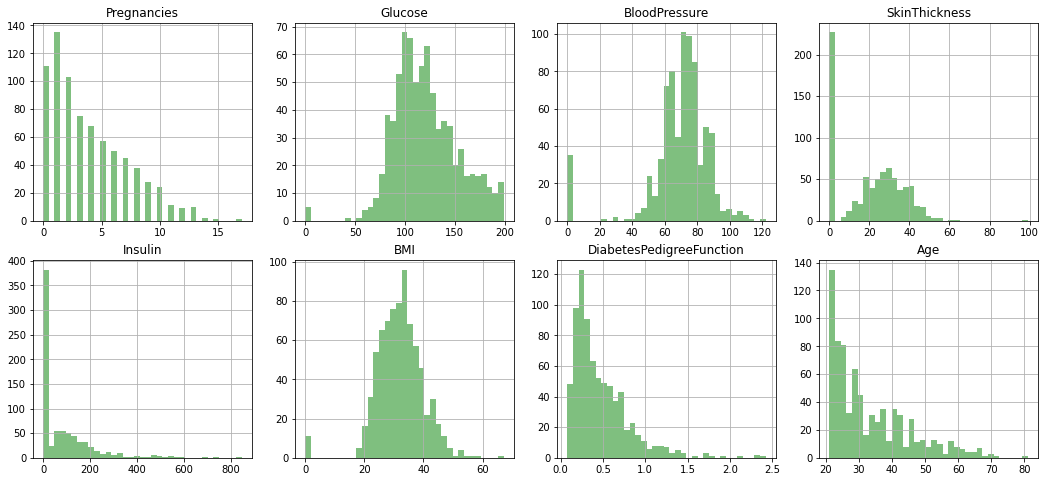

In [ ]:
featuresName = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
ROWS, COLS = 2, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18,8) )
row, col = 0, 0
for i, featureName in enumerate(featuresName):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    
    data[featureName].hist(bins=35, color='green', alpha=0.5, ax=ax[row, col]).set_title(featureName)

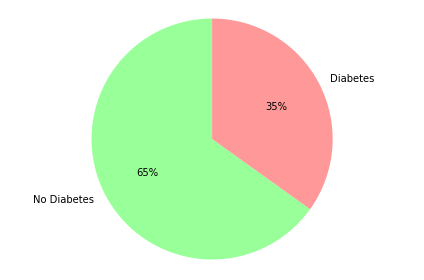

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
s0 = np.sum(data["Outcome"] == 0)
s1 = np.sum(data["Outcome"] == 1)
# plt.pie([s0, s1], labels = ['No Diabetes', 'Diabetes'], autopct='%1.2f%%')
# plt.show()
 
fig1, ax1 = plt.subplots()
ax1.pie([s0, s1], labels=['No Diabetes', 'Diabetes'], autopct='%1.0f%%', startangle=90, colors = ['#99ff99','#ff9999'])
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [ ]:
for col in cols:
    data[col].replace(0,np.NaN,inplace=True)
data.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
for col in data.columns:
    data.loc[(data["Outcome"]==0) & (data[col].isnull()),col] = data[data["Outcome"]==0][col].median()
    data.loc[(data["Outcome"]==1) & (data[col].isnull()),col] = data[data["Outcome"]==1][col].median()

In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

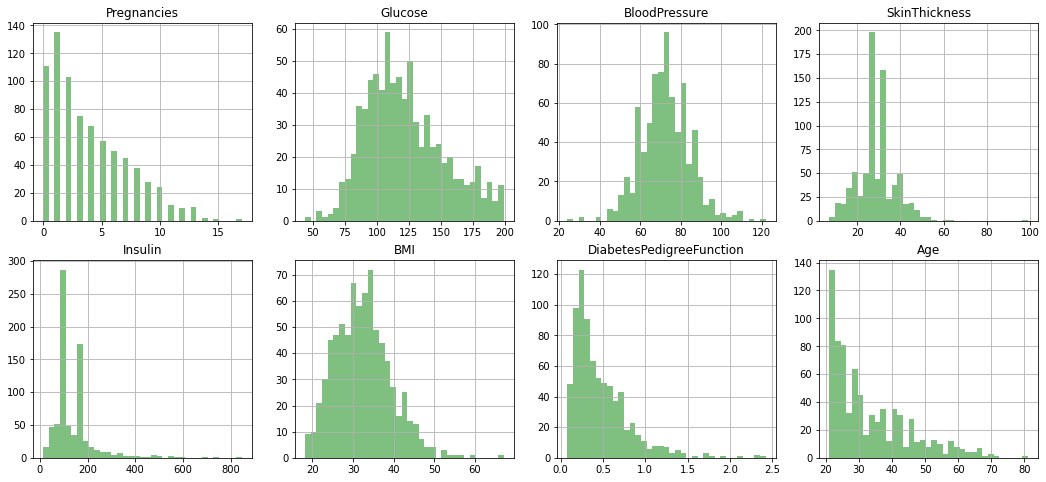

In [ ]:
featuresName = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
ROWS, COLS = 2, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18,8) )
row, col = 0, 0
for i, featureName in enumerate(featuresName):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    
    data[featureName].hist(bins=35, color='green', alpha=0.5, ax=ax[row, col]).set_title(featureName)

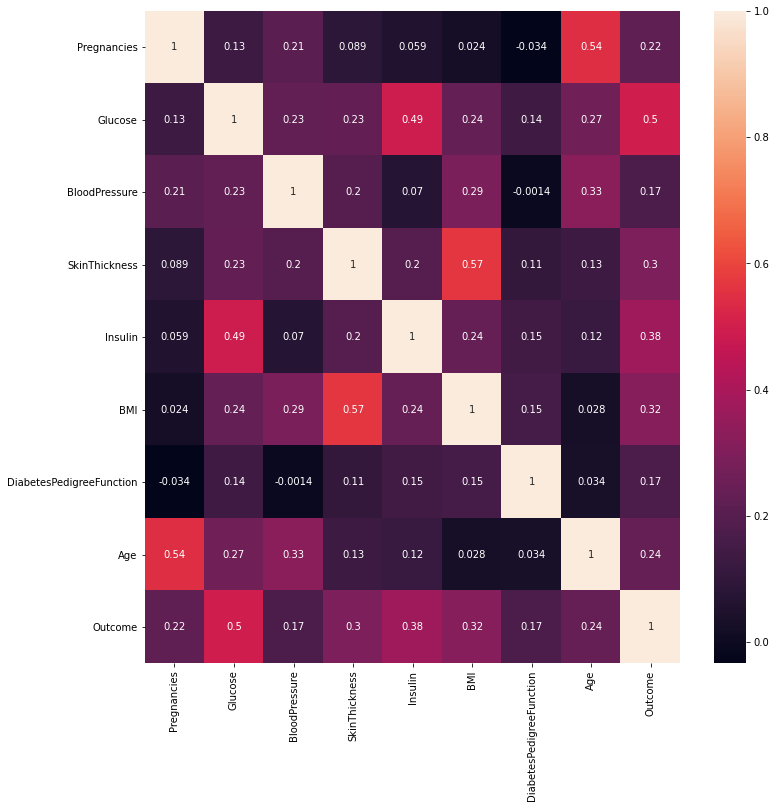

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.corr(),annot=True,ax=ax)
plt.show()

In [ ]:
data_feature_eng=data 
data_feature_eng['glu/bmi']=data_feature_eng['Glucose']/data_feature_eng['BMI']                                                   
data_feature_eng['ins/bmi']=data_feature_eng['Insulin']/data_feature_eng['BMI']
data_feature_eng['glu/ins']=data_feature_eng['Glucose']/data_feature_eng['Insulin']
data_feature_eng['bp/glu']=data_feature_eng['BloodPressure']/data_feature_eng['Glucose']
data_feature_eng['skn/bmi']=data_feature_eng['SkinThickness']/data_feature_eng['BMI']
data_feature_eng['bp/bmi']=data_feature_eng['BloodPressure']/data_feature_eng['BMI']
data_feature_eng['preg/agr']=data_feature_eng['Pregnancies']/data_feature_eng['Age']
data_feature_eng['Skin_normal_abmormal'] = data_feature_eng['SkinThickness'].apply(lambda x: 1 if x <= 20.0 else 0) # normal value if skin thickness
data_feature_eng['bp/ins']=data_feature_eng['BloodPressure']/data_feature_eng['Insulin']

In [ ]:
data_feature_eng

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,glu/bmi,ins/bmi,glu/ins,bp/glu,skn/bmi,bp/bmi,preg/agr,Skin_normal_abmormal,bp/ins
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,4.404762,5.044643,0.873156,0.486486,1.041667,2.142857,0.120000,0,0.424779
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,3.195489,3.853383,0.829268,0.776471,1.090226,2.481203,0.032258,0,0.643902
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,7.854077,7.274678,1.079646,0.349727,1.373391,2.746781,0.250000,0,0.377581
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,3.167260,3.345196,0.946809,0.741573,0.818505,2.348754,0.047619,0,0.702128
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,3.178654,3.897912,0.815476,0.291971,0.812065,0.928074,0.000000,0,0.238095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,3.069909,5.471125,0.561111,0.752475,1.458967,2.310030,0.158730,0,0.422222
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,0,3.315217,2.785326,1.190244,0.573770,0.733696,1.902174,0.074074,0,0.682927
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,4.618321,4.274809,1.080357,0.595041,0.877863,2.748092,0.166667,0,0.642857
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47,1,4.186047,5.631229,0.743363,0.476190,1.063123,1.993355,0.021277,0,0.353982


In [ ]:
#data without feature eng 
x = data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = data['Outcome']


In [ ]:
#data with feature eng 
xf = data_feature_eng [['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','glu/bmi','ins/bmi','glu/ins','bp/glu','skn/bmi','bp/bmi','preg/agr','Skin_normal_abmormal','bp/ins']]
yf = data_feature_eng['Outcome']

In [ ]:
#split data without feature eng 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
#split data with feature eng
x_trainf, x_testf, y_trainf, y_testf = train_test_split(xf, yf, test_size=0.2, random_state=42)

In [ ]:
sum(y_test)

55

In [ ]:
print('Data without feature eng :')
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print(x_trainf.shape, x_testf.shape, y_trainf.shape, y_testf.shape)

Data without feature eng :
(614, 8) (154, 8) (614,) (154,)
(614, 17) (154, 17) (614,) (154,)


In [ ]:
from sklearn.preprocessing import StandardScaler

Sc_X = StandardScaler()
X_train = Sc_X.fit_transform(x_train)
X_test = Sc_X.transform(x_test)

In [ ]:
Sc_Xf = StandardScaler()
x_trainf = Sc_Xf.fit_transform(x_trainf)
x_testf = Sc_Xf.transform(x_testf)

In [ ]:
x_trainf

array([[-0.52639686, -1.25638742, -0.18390222, ..., -0.13494485,
        -0.46458754,  0.02377896],
       [ 1.58804586, -0.32656338,  0.80803889, ...,  0.926102  ,
        -0.46458754, -0.4082721 ],
       [-0.82846011,  0.57005267, -2.16778444, ..., -0.75813376,
         2.15244687, -0.25545273],
       ...,
       [ 1.8901091 , -0.69185139,  1.13868592, ...,  1.96706991,
        -0.46458754, -0.3570753 ],
       [-1.13052335,  0.63646867,  0.1880757 , ..., -1.32713233,
        -0.46458754, -0.5042661 ],
       [-1.13052335,  0.10514064,  1.96530351, ..., -1.32713233,
        -0.46458754,  0.57408215]])

In [ ]:
print('Data with feature eng :')
print(x_trainf.shape, x_testf.shape, y_trainf.shape, y_testf.shape)

Data with feature eng :
(614, 17) (154, 17) (614,) (154,)


# **logistic regression**

logistic regression sans features  engineering

> Indented block



In [ ]:
modele_regLog = LogisticRegression(solver = 'liblinear', multi_class = 'auto')

In [ ]:
#train model using originale data
modele_regLog.fit(x_train,y_train)
y_pred = modele_regLog.predict(x_test)

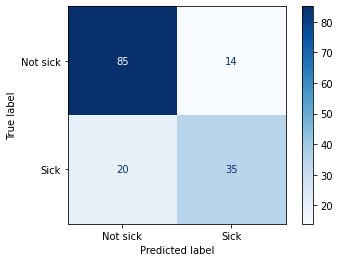

In [ ]:
from sklearn.metrics import plot_confusion_matrix, roc_curve, roc_auc_score
plot_confusion_matrix(modele_regLog, x_test, y_test,  cmap=plt.cm.Blues,values_format='d' ,normalize=None ,display_labels=['Not sick', 'Sick'])

In [ ]:
from sklearn.metrics import *
print("accuracy ==> {0:.0%}".format(accuracy_score(y_test, y_pred)))
print("precision ==> {0:.0%}".format(precision_score(y_test, y_pred)))
print("recall ==> {:0.2f}".format(recall_score(y_test, y_pred)))
print("f1_score ==> {:0.2f}".format(f1_score(y_test, y_pred)))

accuracy ==> 78%
precision ==> 71%
recall ==> 0.64
f1_score ==> 0.67


logistic regression avec features engineering

In [ ]:
#train model using a data after feature eng
modele_regLog.fit(x_trainf,y_trainf)
y_predf = modele_regLog.predict(x_testf)

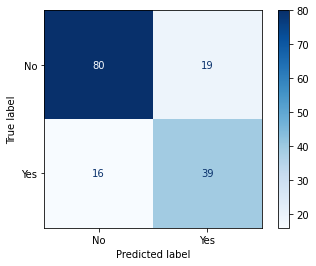

In [ ]:
from sklearn.metrics import plot_confusion_matrix, roc_curve, roc_auc_score
plot_confusion_matrix(modele_regLog, x_testf, y_testf,  cmap=plt.cm.Blues,values_format='d' ,normalize=None ,display_labels=['No', 'Yes'])

In [ ]:
from sklearn.metrics import *
print("accuracy ==> {0:.0%}".format(accuracy_score(y_testf, y_predf)))
print("precision ==> {0:.0%}".format(precision_score(y_testf, y_predf)))
print("recall ==> {:0.2f}".format(recall_score(y_testf, y_predf)))
print("f1_score ==> {:0.2f}".format(f1_score(y_testf, y_predf)))

accuracy ==> 77%
precision ==> 67%
recall ==> 0.71
f1_score ==> 0.69


grid search sans features engineering

In [ ]:
from sklearn.model_selection import GridSearchCV
# log
log_params = {'penalty':['l1', 'l2'], 
              'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 100], 
              'solver':['liblinear', 'saga']}
log_model = GridSearchCV(LogisticRegression(), log_params, cv=5)
log_model.fit(x_train, y_train)
y_predf = log_model.predict(x_test)


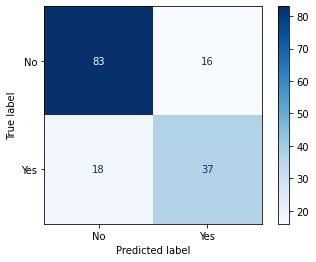

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_model, x_test, y_test,  cmap=plt.cm.Blues,values_format='d' ,normalize=None ,display_labels=['No', 'Yes'])

In [ ]:
from sklearn.metrics import *
print("accuracy ==> {0:.0%}".format(accuracy_score(y_testf, y_predf)))
print("precision ==> {0:.0%}".format(precision_score(y_testf, y_predf)))
print("recall ==> {:0.2f}".format(recall_score(y_testf, y_predf)))
print("f1_score ==> {:0.2f}".format(f1_score(y_testf, y_predf)))

accuracy ==> 78%
precision ==> 70%
recall ==> 0.67
f1_score ==> 0.69


grid search avec features engineering

In [ ]:
from sklearn.model_selection import GridSearchCV
# log
log_params = {'penalty':['l1', 'l2'], 
              'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 100], 
              'solver':['liblinear', 'saga']}
log_model = GridSearchCV(LogisticRegression(), log_params, cv=5)
log_model.fit(x_trainf, y_trainf)
y_predf = log_model.predict(x_testf)


In [ ]:
best_parms_log = log_model.best_params_
print(best_parms_log)

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


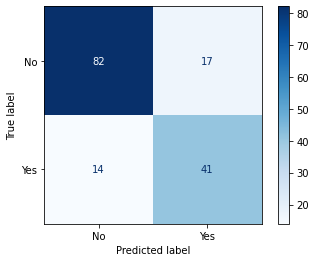

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_model, x_testf, y_testf,  cmap=plt.cm.Blues,values_format='d' ,normalize=None ,display_labels=['No', 'Yes'])

In [ ]:
from sklearn.metrics import *
print("accuracy ==> {0:.0%}".format(accuracy_score(y_testf, y_predf)))
print("precision ==> {0:.0%}".format(precision_score(y_testf, y_predf)))
print("recall ==> {:0.2f}".format(recall_score(y_testf, y_predf)))
print("f1_score ==> {:0.2f}".format(f1_score(y_testf, y_predf)))

accuracy ==> 80%
precision ==> 71%
recall ==> 0.75
f1_score ==> 0.73


# **Gaussian naive bayes**

gaussian naive bayes sans features engineering

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [ ]:
print("Number of mislabeled points out of a total %d points : %d (%d percent)"
...       % (X_test.shape[0], (y_test != y_pred).sum(), 100*(y_test != y_pred).sum()/X_test.shape[0]))

Number of mislabeled points out of a total 154 points : 36 (23 percent)


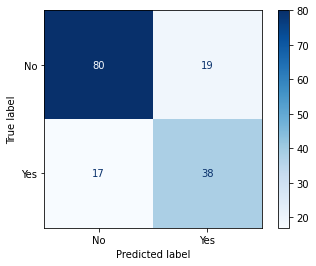

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gnb, X_test, y_test,  cmap=plt.cm.Blues,values_format='d' ,normalize=None ,display_labels=['No', 'Yes'])

In [ ]:
from sklearn.metrics import *
print("accuracy ==> {0:.2%}".format(accuracy_score(y_test, y_pred)))
print("precision ==> {0:.2%}".format(precision_score(y_test, y_pred)))
print("recall ==> {:0.2f}".format(recall_score(y_test, y_pred)))
print("f1_score ==> {:0.2f}".format(f1_score(y_test, y_pred)))

accuracy ==> 76.62%
precision ==> 66.67%
recall ==> 0.69
f1_score ==> 0.68


gaussian naive bayes avec features engineering



In [ ]:
y_predf = gnb.fit(x_trainf, y_trainf).predict(x_testf)

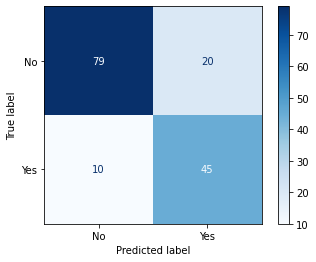

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gnb, x_testf, y_testf,  cmap=plt.cm.Blues,values_format='d' ,normalize=None ,display_labels=['No', 'Yes'])

In [ ]:
from sklearn.metrics import *
print("accuracy ==> {0:.2%}".format(accuracy_score(y_testf, y_predf)))
print("precision ==> {0:.2%}".format(precision_score(y_testf, y_predf)))
print("recall ==> {:0.2f}".format(recall_score(y_testf, y_predf)))
print("f1_score ==> {:0.2f}".format(f1_score(y_testf, y_predf)))

accuracy ==> 80.52%
precision ==> 69.23%
recall ==> 0.82
f1_score ==> 0.75


#**Support Vector Machine**

In [ ]:
import warnings
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
from sklearn.model_selection import cross_val_score , train_test_split
from sklearn.metrics import confusion_matrix , precision_recall_fscore_support , classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn import preprocessing

svm sans features engineering

In [ ]:
svc_model = SVC(kernel='linear')
y_pred = svc_model.fit(x_train, y_train).predict(x_test)

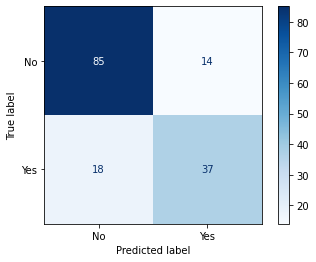

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svc_model, x_test, y_test,  cmap=plt.cm.Blues,values_format='d' ,normalize=None ,display_labels=['No', 'Yes'])

In [ ]:
from sklearn.metrics import *
print("accuracy ==> {0:.0%}".format(accuracy_score(y_test, y_pred)))
print("precision ==> {0:.0%}".format(precision_score(y_test, y_pred)))
print("recall ==> {:0.2f}".format(recall_score(y_test, y_pred)))
print("f1_score ==> {:0.2f}".format(f1_score(y_test, y_pred)))

accuracy ==> 79%
precision ==> 73%
recall ==> 0.67
f1_score ==> 0.70


svm avec features engneering

In [ ]:
svc_model = SVC(kernel='linear')
y_predf = svc_model.fit(x_trainf, y_trainf).predict(x_testf)

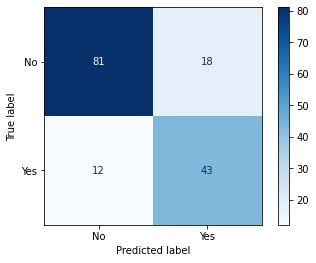

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svc_model, x_testf, y_testf,  cmap=plt.cm.Blues,values_format='d' ,normalize=None ,display_labels=['No', 'Yes'])

In [ ]:
from sklearn.metrics import *
print("accuracy ==> {0:.0%}".format(accuracy_score(y_testf, y_predf)))
print("precision ==> {0:.0%}".format(precision_score(y_testf, y_predf)))
print("recall ==> {:0.2f}".format(recall_score(y_testf, y_predf)))
print("f1_score ==> {:0.2f}".format(f1_score(y_testf, y_predf)))

accuracy ==> 81%
precision ==> 70%
recall ==> 0.78
f1_score ==> 0.74


grid search sans features engineering

In [ ]:
svc_params = {'C': [0.001, 0.01, 0.1, 1],
              'kernel': [ 'linear' , 'poly' , 'rbf' , 'sigmoid' ]}
svc_model = GridSearchCV(SVC(), svc_params, cv=5)
svc_model.fit(x_train, y_train)
y_pred = svc_model.predict(x_test)

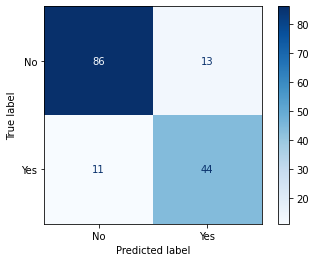

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svc_model, x_test, y_test,  cmap=plt.cm.Blues,values_format='d' ,normalize=None ,display_labels=['No', 'Yes'])

In [ ]:
from sklearn.metrics import *
print("accuracy ==> {0:.0%}".format(accuracy_score(y_test, y_pred)))
print("precision ==> {0:.0%}".format(precision_score(y_test, y_pred)))
print("recall ==> {:0.2f}".format(recall_score(y_test, y_pred)))
print("f1_score ==> {:0.2f}".format(f1_score(y_test, y_pred)))

accuracy ==> 84%
precision ==> 77%
recall ==> 0.80
f1_score ==> 0.79


grid search avec features engineering

In [ ]:
svc_params = {'C': [0.001, 0.01, 0.1, 1],
              'kernel': [ 'linear' , 'poly' , 'rbf' , 'sigmoid' ]}
svc_model = GridSearchCV(SVC(), svc_params, cv=5)
svc_model.fit(x_trainf, y_trainf)
y_predf = svc_model.predict(x_testf)

In [ ]:
best_parms_svc = svc_model.best_params_
print(best_parms_svc)

{'C': 1, 'kernel': 'rbf'}


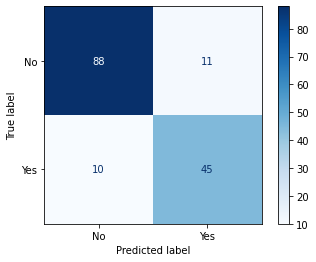

In [ ]:
from sklearn.metrics import plot_confusion_matrix, roc_curve, roc_auc_score
plot_confusion_matrix(svc_model, x_testf, y_testf,  cmap=plt.cm.Blues,values_format='d' ,normalize=None ,display_labels=['No', 'Yes'])

In [ ]:
from sklearn.metrics import *
print("accuracy ==> {0:.0%}".format(accuracy_score(y_testf, y_predf)))
print("precision ==> {0:.0%}".format(precision_score(y_testf, y_predf)))
print("recall ==> {:0.2f}".format(recall_score(y_testf, y_predf)))
print("f1_score ==> {:0.2f}".format(f1_score(y_testf, y_predf)))

accuracy ==> 86%
precision ==> 80%
recall ==> 0.82
f1_score ==> 0.81


# **Decision tree**

decision tree sans features engineering

In [ ]:
 from sklearn import tree
dt_model = tree.DecisionTreeClassifier(criterion='gini')
y_pred = dt_model.fit(x_train, y_train).predict(x_test)

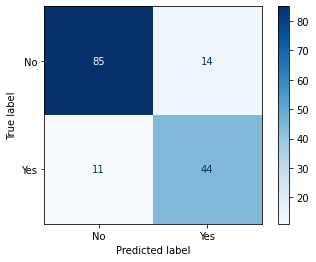

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt_model, x_test, y_test,  cmap=plt.cm.Blues,values_format='d' ,normalize=None ,display_labels=['No', 'Yes'])

In [ ]:
from sklearn.metrics import *
print("accuracy ==> {0:.0%}".format(accuracy_score(y_test, y_pred)))
print("precision ==> {0:.0%}".format(precision_score(y_test, y_pred)))
print("recall ==> {:0.2f}".format(recall_score(y_test, y_pred)))
print("f1_score ==> {:0.2f}".format(f1_score(y_test, y_pred)))

accuracy ==> 84%
precision ==> 76%
recall ==> 0.80
f1_score ==> 0.78


decision tree avec features engineering

In [ ]:
 from sklearn import tree
dt_model = tree.DecisionTreeClassifier(criterion='entropy')
y_predf = dt_model.fit(x_trainf, y_trainf).predict(x_testf)

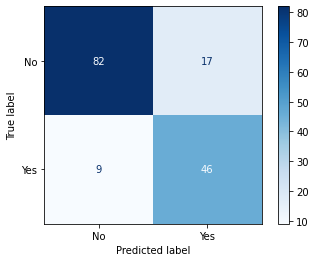

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt_model, x_testf, y_testf,  cmap=plt.cm.Blues,values_format='d' ,normalize=None ,display_labels=['No', 'Yes'])

In [ ]:
from sklearn.metrics import *
print("accuracy ==> {0:.0%}".format(accuracy_score(y_testf, y_predf)))
print("precision ==> {0:.0%}".format(precision_score(y_testf, y_predf)))
print("recall ==> {:0.2f}".format(recall_score(y_testf, y_predf)))
print("f1_score ==> {:0.2f}".format(f1_score(y_testf, y_predf)))

accuracy ==> 83%
precision ==> 73%
recall ==> 0.84
f1_score ==> 0.78


grid search sans features engineering

In [ ]:

dt_params = {'criterion' : ['gini', 'entropy'],
              'splitter': ['random', 'best'], 
              'max_depth': [None,3, 5, 7, 9, 11, 13]}
dt_model = GridSearchCV(tree.DecisionTreeClassifier(), dt_params, cv=5)
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)


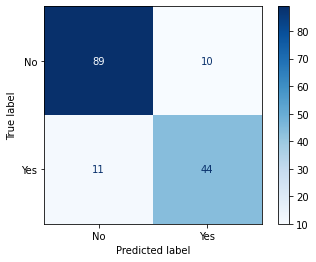

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt_model, x_test, y_test,  cmap=plt.cm.Blues,values_format='d' ,normalize=None ,display_labels=['No', 'Yes'])

In [ ]:
dt_params = {'criterion' : ['gini', 'entropy'],
              'splitter': ['random', 'best'], 
              'max_depth': [None,3, 5, 7, 9, 11, 13]}
dt_model = GridSearchCV(tree.DecisionTreeClassifier(), dt_params, cv=5)
dt_model.fit(x_train, y_train)
y_predf = dt_model.predict(x_test)


In [ ]:
from sklearn.metrics import *
print("accuracy ==> {0:.0%}".format(accuracy_score(y_test, y_pred)))
print("precision ==> {0:.0%}".format(precision_score(y_test, y_pred)))
print("recall ==> {:0.2f}".format(recall_score(y_test, y_pred)))
print("f1_score ==> {:0.2f}".format(f1_score(y_test, y_pred)))

accuracy ==> 86%
precision ==> 81%
recall ==> 0.80
f1_score ==> 0.81


grid search avec features engineering

In [ ]:

dt_params = {'criterion' : ['gini', 'entropy'],
              'splitter': ['random', 'best'], 
              'max_depth': [None,3, 5, 7, 9, 11, 13]}
dt_model = GridSearchCV(tree.DecisionTreeClassifier(), dt_params, cv=5)
dt_model.fit(x_trainf, y_trainf)
y_predf = dt_model.predict(x_testf)


In [ ]:
best_params_dt = dt_model.best_params_
best_params_dt

{'criterion': 'gini', 'max_depth': 9, 'splitter': 'best'}

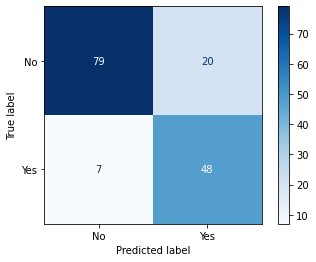

In [ ]:
from sklearn.metrics import plot_confusion_matrix, roc_curve, roc_auc_score
plot_confusion_matrix(dt_model, x_testf, y_testf,  cmap=plt.cm.Blues,values_format='d' ,normalize=None ,display_labels=['No', 'Yes'])

In [ ]:
from sklearn.metrics import *
print("accuracy ==> {0:.0%}".format(accuracy_score(y_testf, y_predf)))
print("precision ==> {0:.0%}".format(precision_score(y_testf, y_predf)))
print("recall ==> {:0.2f}".format(recall_score(y_testf, y_predf)))
print("f1_score ==> {:0.2f}".format(f1_score(y_testf, y_predf)))

accuracy ==> 82%
precision ==> 71%
recall ==> 0.87
f1_score ==> 0.78


# **Ensemble Learning**

# **Random Forest**

random forest sans features  engineering

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


rf_model = RandomForestClassifier(n_estimators=15)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

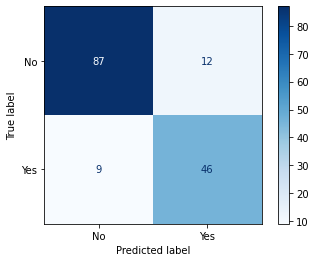

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_model, x_test, y_test,  cmap=plt.cm.Blues,values_format='d' ,normalize=None ,display_labels=['No', 'Yes'])

In [ ]:
from sklearn.metrics import *
print("accuracy ==> {0:.0%}".format(accuracy_score(y_test, y_pred)))
print("precision ==> {0:.0%}".format(precision_score(y_test, y_pred)))
print("recall ==> {:0.2f}".format(recall_score(y_test, y_pred)))
print("f1_score ==> {:0.2f}".format(f1_score(y_test, y_pred)))

accuracy ==> 86%
precision ==> 79%
recall ==> 0.84
f1_score ==> 0.81


random forest avec features engineering

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


rf_model = RandomForestClassifier(n_estimators=15)
rf_model.fit(x_trainf, y_trainf)
y_predf = rf_model.predict(x_testf)

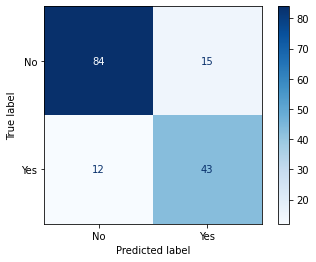

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_model, x_testf, y_testf,  cmap=plt.cm.Blues,values_format='d' ,normalize=None ,display_labels=['No', 'Yes'])

In [ ]:
from sklearn.metrics import *
print("accuracy ==> {0:.0%}".format(accuracy_score(y_testf, y_predf)))
print("precision ==> {0:.0%}".format(precision_score(y_testf, y_predf)))
print("recall ==> {:0.2f}".format(recall_score(y_testf, y_predf)))
print("f1_score ==> {:0.2f}".format(f1_score(y_testf, y_predf)))

accuracy ==> 82%
precision ==> 74%
recall ==> 0.78
f1_score ==> 0.76


gride seach sans features engineering

In [ ]:

rf_params = {'criterion' : ['gini', 'entropy'],
             'n_estimators': list(range(5, 50,5)),
             'max_depth': list(range(3, 20, 2)),
             'max_features': [None,'log2','sqrt']}
rf_model = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

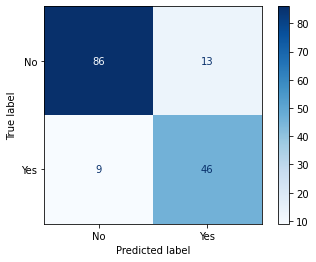

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_model, x_test, y_test,  cmap=plt.cm.Blues,values_format='d' ,normalize=None ,display_labels=['No', 'Yes'])

In [ ]:
from sklearn.metrics import *
print("accuracy ==> {0:.0%}".format(accuracy_score(y_test, y_pred)))
print("precision ==> {0:.0%}".format(precision_score(y_test, y_pred)))
print("recall ==> {:0.2f}".format(recall_score(y_test, y_pred)))
print("f1_score ==> {:0.2f}".format(f1_score(y_test, y_pred)))

accuracy ==> 86%
precision ==> 78%
recall ==> 0.84
f1_score ==> 0.81


grid search avec features engineering

In [ ]:

rf_params = {'criterion' : ['gini', 'entropy'],
             'n_estimators': list(range(5, 50,5)),
             'max_depth': list(range(3, 20, 2)),
             'max_features': [None,'log2','sqrt']}
rf_model = GridSearchCV(RandomForestClassifier(), rf_params,scoring='recall' ,cv=5)
rf_model.fit(x_trainf, y_trainf)
y_predf = rf_model.predict(x_testf)

In [ ]:
best_parms_rf = rf_model.best_params_
best_parms_rf

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': None,
 'n_estimators': 45}

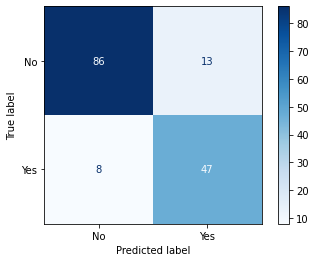

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_model, x_testf, y_testf,  cmap=plt.cm.Blues,values_format='d' ,normalize=None ,display_labels=['No', 'Yes'])

In [ ]:
from sklearn.metrics import *
print("accuracy ==> {0:.0%}".format(accuracy_score(y_testf, y_predf)))
print("precision ==> {0:.0%}".format(precision_score(y_testf, y_predf)))
print("recall ==> {:0.2f}".format(recall_score(y_testf, y_predf)))
print("f1_score ==> {:0.2f}".format(f1_score(y_testf, y_predf)))

accuracy ==> 86%
precision ==> 78%
recall ==> 0.85
f1_score ==> 0.82


# **Hard Voting**

In [ ]:
from sklearn.ensemble import  VotingClassifier


models = [('lr', LogisticRegression(penalty=best_parms_log['penalty'],C=best_parms_log['C'], 
                                    solver=best_parms_log['solver'],
                                    )),
          ('gnb',GaussianNB()),
          ('svc', SVC(C=best_parms_svc['C'], kernel=best_parms_svc['kernel'],
                      probability=True)),
          ('dt', tree.DecisionTreeClassifier(criterion=best_params_dt['criterion'],
                                             max_depth=best_params_dt['max_depth'],
                                             splitter=best_params_dt['splitter'])),
          
          ('rf', RandomForestClassifier(n_estimators=best_parms_rf['n_estimators'],
                                        criterion=best_parms_rf['criterion'], max_depth=best_parms_rf['max_depth'],
                                        max_features=best_parms_rf['max_features']
                                        ))
          ]

In [ ]:
ensemble = VotingClassifier(estimators=models, voting='hard')
y_predf = ensemble.fit(x_trainf, y_trainf).predict(x_testf)

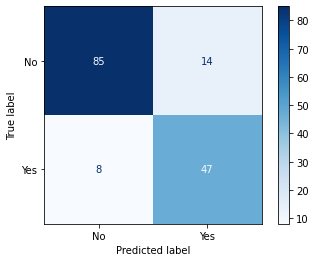

In [ ]:
from sklearn.metrics import plot_confusion_matrix, roc_curve, roc_auc_score
plot_confusion_matrix(ensemble, x_testf, y_testf,  cmap=plt.cm.Blues,values_format='d' ,normalize=None ,display_labels=['No', 'Yes'])

In [ ]:
from sklearn.metrics import *
print("accuracy ==> {0:.0%}".format(accuracy_score(y_testf, y_predf)))
print("precision ==> {0:.0%}".format(precision_score(y_testf, y_predf)))
print("recall ==> {:0.2f}".format(recall_score(y_testf, y_predf)))
print("f1_score ==> {:0.2f}".format(f1_score(y_testf, y_predf)))

accuracy ==> 86%
precision ==> 77%
recall ==> 0.85
f1_score ==> 0.81


# **Soft Voting**

In [ ]:
ensemble = VotingClassifier(estimators=models, voting='soft')
y_predf = ensemble.fit(x_trainf, y_trainf).predict(x_testf)

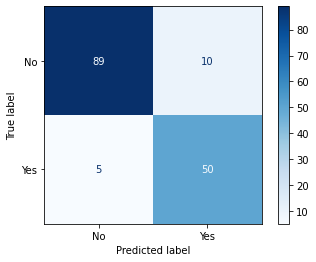

In [ ]:
from sklearn.metrics import plot_confusion_matrix, roc_curve, roc_auc_score
plot_confusion_matrix(ensemble, x_testf, y_testf,  cmap=plt.cm.Blues,values_format='d' ,normalize=None ,display_labels=['No', 'Yes'])

In [ ]:
from sklearn.metrics import *
print("accuracy ==> {0:.0%}".format(accuracy_score(y_testf, y_predf)))
print("precision ==> {0:.0%}".format(precision_score(y_testf, y_predf)))
print("recall ==> {:0.2f}".format(recall_score(y_testf, y_predf)))
print("f1_score ==> {:0.2f}".format(f1_score(y_testf, y_predf)))

accuracy ==> 90%
precision ==> 83%
recall ==> 0.91
f1_score ==> 0.87
